# Task - 03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Dataset :- https://archive.ics.uci.edu/dataset/222/bank+marketing

 This dataset contains information about a direct marketing campaign of a Portuguese banking institution. The goal is to predict whether the client will subscribe to a term deposit .

 To build a decision tree classifier for predicting whether a customer will purchase a product or service, we will use the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

In [5]:
#Load the dataset
df = pd.read_csv('/content/bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.shape #Total no. of rows & cols

(4521, 17)

In [7]:
df.info() #summary of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.isnull().sum() #check for null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can see, there are no null values & no duplicates values as well.

In [9]:
df.duplicated().sum() #check for duplicate values

0

In [16]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [17]:
# Separate features and target variable
X = df_encoded.drop(columns=['y_yes'])
y = df_encoded['y_yes']

In [18]:
X.head(), y.head()

(   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
 0   30     1787   19        79         1     -1         0            False   
 1   33     4789   11       220         1    339         4            False   
 2   35     1350   16       185         1    330         1            False   
 3   30     1476    3       199         4     -1         0            False   
 4   59        0    5       226         1     -1         0             True   
 
    job_entrepreneur  job_housemaid  ...  month_jul  month_jun  month_mar  \
 0             False          False  ...      False      False      False   
 1             False          False  ...      False      False      False   
 2             False          False  ...      False      False      False   
 3             False          False  ...      False       True      False   
 4             False          False  ...      False      False      False   
 
    month_may  month_nov  month_oct  month_sep  poutcome_oth

The dataset has been preprocessed successfully. Here are the key points:

There are no missing values in the dataset.

Categorical variables have been encoded into dummy variables.

The features and target variable have been separated.

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3616, 42), (905, 42), (3616,), (905,))

The data has been successfully split into training and testing sets. The shapes of the sets are as follows:

**Training set: 3616 samples, 42 features**

**Testing set: 905 samples, 42 features**

In [23]:
#Train the model
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [25]:
#Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.8806629834254144
Precision: 0.4537037037037037
Recall: 0.5
F1 Score: 0.47572815533980584


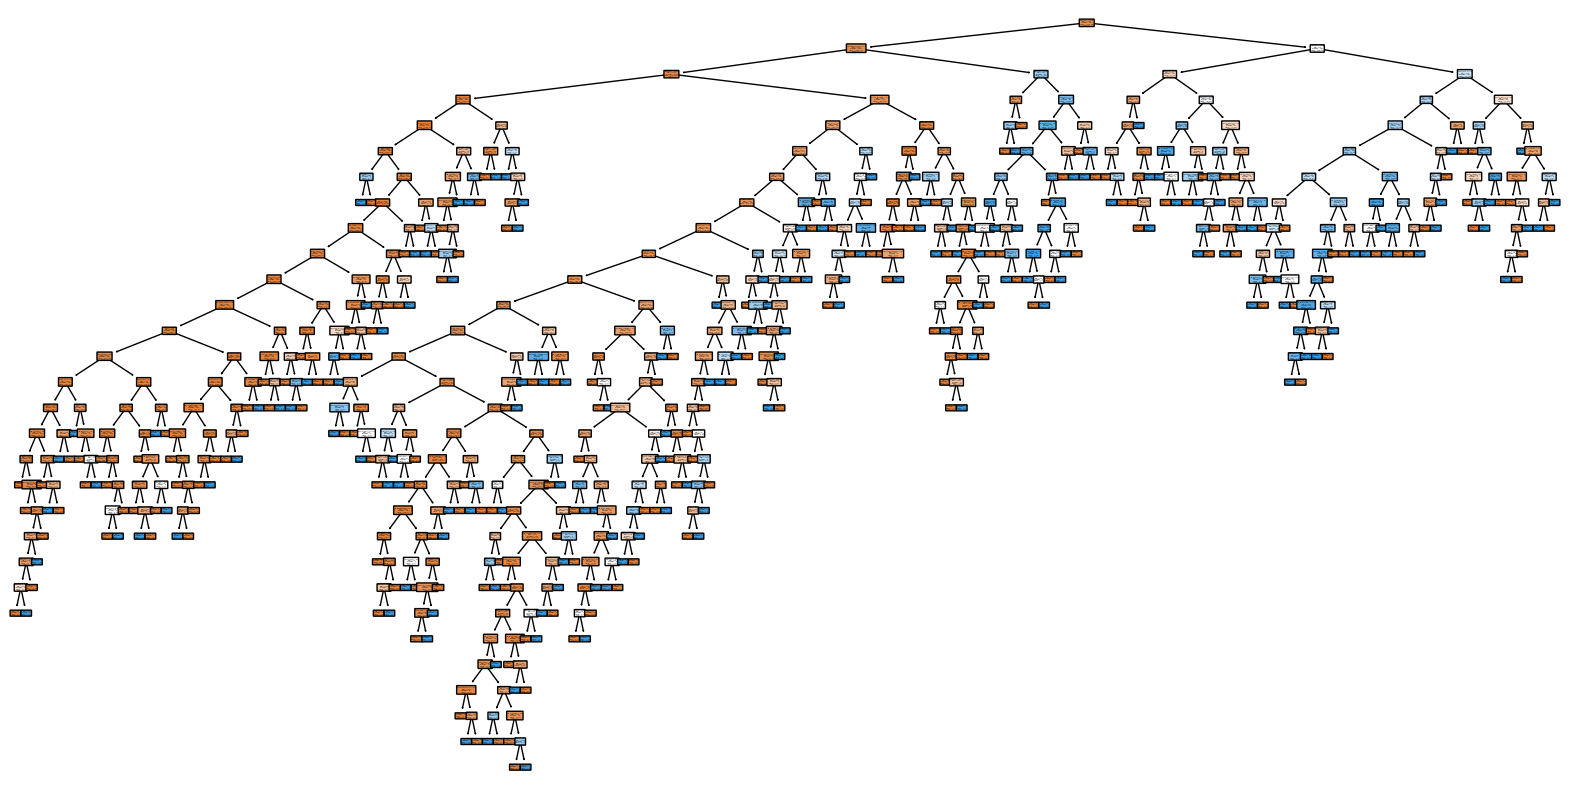

In [26]:
#Visualize the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.show()
